# Ednei Cunha Vicente

O conjunto de dados de mortes devido a drogas em Connecticut contém informações sobre 5106 pessoas que morreram devido a overdose de drogas entre 2012 e 2018 em Connecticut, EUA.

O conjunto de dados inclui dados relacionados à idade, raça, sexo, local de residência das vítimas, bem como as drogas que tomaram por overdose. Essas informações podem ser usadas para entender se o uso de drogas é prevalente em uma área ou cidade específica, o uso de drogas por indivíduos de diferentes faixas etárias e raças, bem como a popularidade de diferentes tipos de drogas.

Este conjunto de dados foi obtido do [governo dos EUA Open Data Initiative] (https://data.gov) [Conjunto de dados de mortes relacionadas a drogas acidentais] (https://catalog.data.gov/dataset/accidental-drug-related-deaths-january-2012-sept-2015). A página Open Data Initiative menciona o seguinte como a fonte original do conjunto de dados:

Governo local, Connecticut

O objetivo desta analise sera responder perguntas sobre o impacto que as droga tiveram em tais óbitos.

Criar um modelo de cluster usando o algoritmo k_means, PCA para redução de dimensionalidade e a métrica silhuette_score.

Algumas informacoes sobre o estado de Connecticut: Connecticut (ou Coneticute[2] ou Conecticute) é um dos 50 estados dos Estados Unidos, localizado na região da Nova Inglaterra. Connecticut é o terceiro menor estado norte-americano em extensão territorial; somente Delaware e Rhode Island são menores. Connecticut é o quarto estado norte-americano mais densamente povoado do país. A principal fonte de renda de Connecticut é a prestação de serviços financeiros e imobiliários.

In [1]:
#manipulação e visualização de dados
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import matplotlib.pyplot as plt
import plotly.offline as pyoff
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
%matplotlib inline
#=============================================
#machine learning
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

#=========================================
import warnings
warnings.filterwarnings('ignore')

#formatação dos gráficos
import matplotlib as m
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 20, 8

In [2]:
#versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Ednei Cunha Vicente" --iversions

Author: Ednei Cunha Vicente

plotly    : 4.14.3
sklearn   : 1.0.2
seaborn   : 0.9.0
pandas    : 1.2.2
numpy     : 1.20.1
matplotlib: 3.4.2



In [3]:
#carrega os dados
dados = pd.read_csv('dados/novo_df_part2.csv')

In [4]:
dados.head()

,AnoMes,Idade,Sexo,Etnia,Morte/Cidade,Heroina,Cocaina,Fantanil,FantanilAnalogue,Oxicodona,...,Benzodiazepina,Metadona,Anfeto,Tramad,Morfine_NtoHeroine,Hidromorfina,OpiaceosNOS,AnyOpioid,ContagemDrogas,Nova_Data
0,201411.0,47,Male,White,BRIDGEPORT,Sim,Nao,Nao,Nao,Nao,...,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,2,Senior
1,201408.0,54,Female,White,BRIDGEPORT,Sim,Sim,Nao,Nao,Nao,...,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,2,Senior
2,201603.0,57,Male,White,BRIDGEPORT,Nao,Nao,Nao,Nao,Nao,...,Sim,Nao,Nao,Nao,Sim,Nao,Nao,Sim,3,Senior
3,201705.0,36,Male,Black,BRIDGEPORT,Sim,Sim,Sim,Nao,Nao,...,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,3,Adulto
4,201209.0,44,Male,Black,BRIDGEPORT,Sim,Sim,Nao,Nao,Nao,...,Nao,Sim,Nao,Nao,Nao,Nao,Nao,Nao,3,Senior


Nesta parte usarei a tecnica de Machine Learning usando o algoritmo K-means para agrupar.

Serão necessário algumas modificações nos dados requerido pelo algoritmo, como o "label encoder" que veremos a seguir.

In [5]:
drogas = ['Sexo','Etnia','Morte/Cidade', 'Heroina',
       'Cocaina', 'Fantanil', 'FantanilAnalogue', 'Oxicodona', 'Oximorfona',
       'Etanol', 'Hydrocodone', 'Benzodiazepina', 'Metadona', 'Anfeto',
       'Tramad', 'Morfine_NtoHeroine', 'Hidromorfina', 'OpiaceosNOS',
       'AnyOpioid']

In [6]:
#cria uma variavel com chaves vazias
all_label = {}

#criar variaveis ja transformadas com label encoder sem modificar as atuais
for name in drogas:
    labelencoder = LabelEncoder()
    all_label[name] = labelencoder
    labelencoder.fit(dados[name])
    dados['labelencoder_' + name] = labelencoder.transform(dados[name])
    

In [7]:
# Remove valores missing eventualmente gerados
dados.dropna(inplace = True)

In [8]:
dados.head()

,AnoMes,Idade,Sexo,Etnia,Morte/Cidade,Heroina,Cocaina,Fantanil,FantanilAnalogue,Oxicodona,...,labelencoder_Etanol,labelencoder_Hydrocodone,labelencoder_Benzodiazepina,labelencoder_Metadona,labelencoder_Anfeto,labelencoder_Tramad,labelencoder_Morfine_NtoHeroine,labelencoder_Hidromorfina,labelencoder_OpiaceosNOS,labelencoder_AnyOpioid
0,201411.0,47,Male,White,BRIDGEPORT,Sim,Nao,Nao,Nao,Nao,...,1,0,0,0,0,0,0,0,0,0
1,201408.0,54,Female,White,BRIDGEPORT,Sim,Sim,Nao,Nao,Nao,...,0,0,0,0,0,0,0,0,0,0
2,201603.0,57,Male,White,BRIDGEPORT,Nao,Nao,Nao,Nao,Nao,...,0,0,1,0,0,0,1,0,0,1
3,201705.0,36,Male,Black,BRIDGEPORT,Sim,Sim,Sim,Nao,Nao,...,0,0,0,0,0,0,0,0,0,0
4,201209.0,44,Male,Black,BRIDGEPORT,Sim,Sim,Nao,Nao,Nao,...,0,0,0,1,0,0,0,0,0,0


In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2466 entries, 0 to 2465
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   AnoMes                           2466 non-null   float64
 1   Idade                            2466 non-null   int64  
 2   Sexo                             2466 non-null   object 
 3   Etnia                            2466 non-null   object 
 4   Morte/Cidade                     2466 non-null   object 
 5   Heroina                          2466 non-null   object 
 6   Cocaina                          2466 non-null   object 
 7   Fantanil                         2466 non-null   object 
 8   FantanilAnalogue                 2466 non-null   object 
 9   Oxicodona                        2466 non-null   object 
 10  Oximorfona                       2466 non-null   object 
 11  Etanol                           2466 non-null   object 
 12  Hydrocodone         

# Análise de Cluster¶


Clusterização é um processo de aprendizagem não supervisionada, quando entregamos a um algoritmo de Machine Learning somente os dados de entrada e durante o treinamento, o algoritmo cria um modelo capaz de gerar saídas, nesse caso grupos, ou clusters.

# Algoritmo de Clusterização K-means

O K-Means Clustering é um algoritmo de aprendizado de máquina não supervisionado. Em contraste com os algoritmos tradicionais de aprendizado de máquina supervisionado, o K-Means tenta classificar dados sem antes ter sido treinado com dados rotulados. Depois que o algoritmo é executado e os grupos são definidos, qualquer novo dado pode ser facilmente atribuído ao grupo mais relevante.

In [10]:
x1 = dados.reset_index()
x1 = dados[['labelencoder_Sexo','labelencoder_Etnia','labelencoder_Morte/Cidade', 'labelencoder_Heroina',
       'labelencoder_Cocaina', 'labelencoder_Fantanil', 'labelencoder_FantanilAnalogue', 'labelencoder_Oxicodona', 'labelencoder_Oximorfona',
       'labelencoder_Etanol', 'labelencoder_Hydrocodone', 'labelencoder_Benzodiazepina', 'labelencoder_Metadona', 'labelencoder_Anfeto',
       'labelencoder_Tramad', 'labelencoder_Morfine_NtoHeroine', 'labelencoder_Hidromorfina', 'labelencoder_OpiaceosNOS',
       'labelencoder_AnyOpioid']]
x1.head()

,labelencoder_Sexo,labelencoder_Etnia,labelencoder_Morte/Cidade,labelencoder_Heroina,labelencoder_Cocaina,labelencoder_Fantanil,labelencoder_FantanilAnalogue,labelencoder_Oxicodona,labelencoder_Oximorfona,labelencoder_Etanol,labelencoder_Hydrocodone,labelencoder_Benzodiazepina,labelencoder_Metadona,labelencoder_Anfeto,labelencoder_Tramad,labelencoder_Morfine_NtoHeroine,labelencoder_Hidromorfina,labelencoder_OpiaceosNOS,labelencoder_AnyOpioid
0,1,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
3,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


# PCA é uma técnicas de redução de dimensionalidade. Os componentes capturam a variablilidade dos dados de entrada por meio de uma combinação linear


Bloco 1 :  representa o conceito de pipelines. Os dados não estão no formato ideal para o k-means, então o ideal é criar um
pipeline.

Na primeira parte será implementado a função 'MinMaxScaler' para que os dados sigam uma distribuição normal, e será implementado
também o 'PCA'.

In [11]:
process = Pipeline([('scaler',MinMaxScaler()),
                   ('pca',PCA(n_components=2, random_state=42)),])
process

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('pca', PCA(n_components=2, random_state=42))])

Bloco 2 : Criar um pipeline para realizar o cluster.

In [12]:
cluster = Pipeline([('Kmeans',KMeans(n_clusters=5,
                                    init='k-means++',
                                    n_init=50,
                                    max_iter=500,
                                    random_state=42))])
cluster

Pipeline(steps=[('Kmeans',
                 KMeans(max_iter=500, n_clusters=5, n_init=50,
                        random_state=42))])

Bloco 3 : Nesse bloco vamos encadear para formar um pipeline de cluster maior passando os pipelines "process" e "cluster".

In [13]:
pipe = Pipeline([("preprocessor", process),
                ("cluster", cluster)])
pipe.fit(x1)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('cluster',
                 Pipeline(steps=[('Kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

Avaliar o desempenho calculando o coeficiente de silhueta. Um coeficiente de silhueta de 0 indica que os clusters estão se 
sobrepondo e um coeficiente de silhueta de 1 indica que os clasters estão bem separados.

In [14]:
preprocess = pipe['preprocessor'].transform(x1)
predict_label = pipe['cluster']['Kmeans'].labels_
silhouette_score(preprocess, predict_label)

0.4100465845402917

Criar um DataFrame do pandas com resultado com rótulos previstos.

In [15]:
pcadf = pd.DataFrame(pipe['preprocessor'].transform(x1),
                    columns=["component_1","component_2"])
pcadf["predict_cluster"] = pipe['cluster']['Kmeans'].labels_
#pcadf['true_label'] = x1


In [16]:
pcadf

,component_1,component_2,predict_cluster
0,-0.282131,-0.425522,2
1,-0.644579,-0.681250,2
2,-0.073513,0.829772,4
3,0.241916,-1.031090,0
4,-0.466437,-1.037092,2
...,...,...,...
2461,0.407509,1.233808,4
2462,-0.002545,0.359192,4
2463,0.211053,-0.700693,0
2464,0.349470,-0.289228,0


Plotar o resultado usando a biblioteca seaborn.

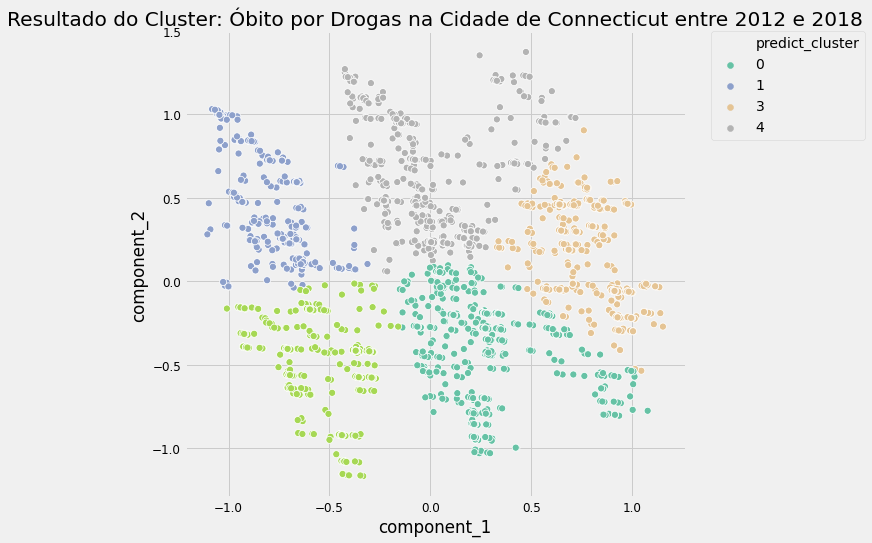

In [17]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))

scat = sns.scatterplot("component_1",
                      "component_2",
                      s=50,
                      data=pcadf,
                      hue='predict_cluster',
                      palette='Set2')
scat.set_title("Resultado do Cluster: Óbito por Drogas na Cidade de Connecticut entre 2012 e 2018")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.0)
plt.show()

In [18]:
silhouett_scores = []
aru_scores = []

for n in range(2, 11):
    
    pipe['preprocessor']['pca'].n_components = n
    pipe.fit(x1)
    
    silhouette_coef = silhouette_score(
        pipe['preprocessor'].transform(x1),
        pipe['cluster']['Kmeans'].labels_,
    )
    silhouett_scores.append(silhouette_coef)

Obsevação: O coeficiente de silhueta diminui linearmente ele depende da distância entre os pontos, à medida que o numero de 
dimensões aumenta, a espasidade aumenta.

Text(0.5, 1.0, 'Clustering: Desempenho em Função de Números de Componentes')

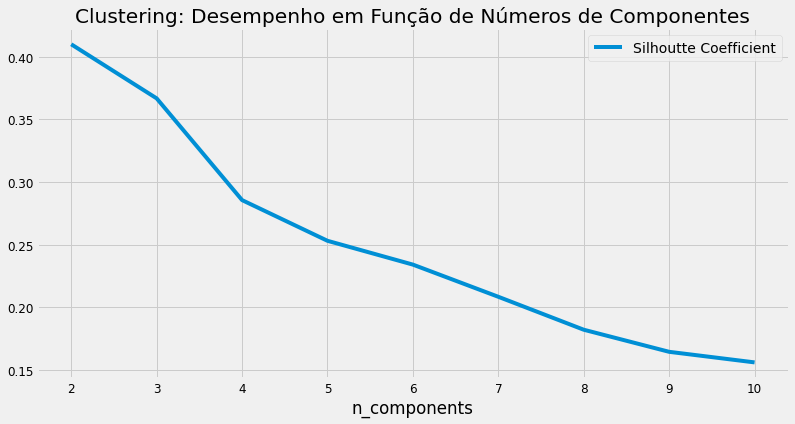

In [19]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
plt.plot(range(2,11),
        silhouett_scores,
        c='#008fd5',
        label="Silhoutte Coefficient",
        )
plt.xlabel("n_components")
plt.legend()
plt.title("Clustering: Desempenho em Função de Números de Componentes")

Criar um cluster do modelo

In [20]:
names = ['Idade','Sexo','Etnia','Morte/Cidade','Nova_Data', 'Heroina',
       'Cocaina', 'Fantanil', 'FantanilAnalogue', 'Oxicodona', 'Oximorfona',
       'Etanol', 'Hydrocodone', 'Benzodiazepina', 'Metadona', 'Anfeto',
       'Tramad', 'Morfine_NtoHeroine', 'Hidromorfina', 'OpiaceosNOS',
       'AnyOpioid']

In [21]:
#unir o resultado do cluster com o conjunto de dados
cluster_map = pd.DataFrame(dados,columns=names)
cluster_map['Cluster'] = pcadf['predict_cluster']
cluster_map.head()

,Idade,Sexo,Etnia,Morte/Cidade,Nova_Data,Heroina,Cocaina,Fantanil,FantanilAnalogue,Oxicodona,...,Hydrocodone,Benzodiazepina,Metadona,Anfeto,Tramad,Morfine_NtoHeroine,Hidromorfina,OpiaceosNOS,AnyOpioid,Cluster
0,47,Male,White,BRIDGEPORT,Senior,Sim,Nao,Nao,Nao,Nao,...,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,2
1,54,Female,White,BRIDGEPORT,Senior,Sim,Sim,Nao,Nao,Nao,...,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,2
2,57,Male,White,BRIDGEPORT,Senior,Nao,Nao,Nao,Nao,Nao,...,Nao,Sim,Nao,Nao,Nao,Sim,Nao,Nao,Sim,4
3,36,Male,Black,BRIDGEPORT,Adulto,Sim,Sim,Sim,Nao,Nao,...,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,0
4,44,Male,Black,BRIDGEPORT,Senior,Sim,Sim,Nao,Nao,Nao,...,Nao,Nao,Sim,Nao,Nao,Nao,Nao,Nao,Nao,2


In [22]:
cluster_map.groupby('Cluster')['Idade'].mean()

Cluster
0    41.747126
1    44.278107
2    43.193262
3    42.105906
4    42.426724
Name: Idade, dtype: float64

In [23]:
perc = pd.crosstab(cluster_map['Nova_Data'],cluster_map['Cluster'])

Text(0.5, 1.0, 'Contagem de Cluster por Classes')

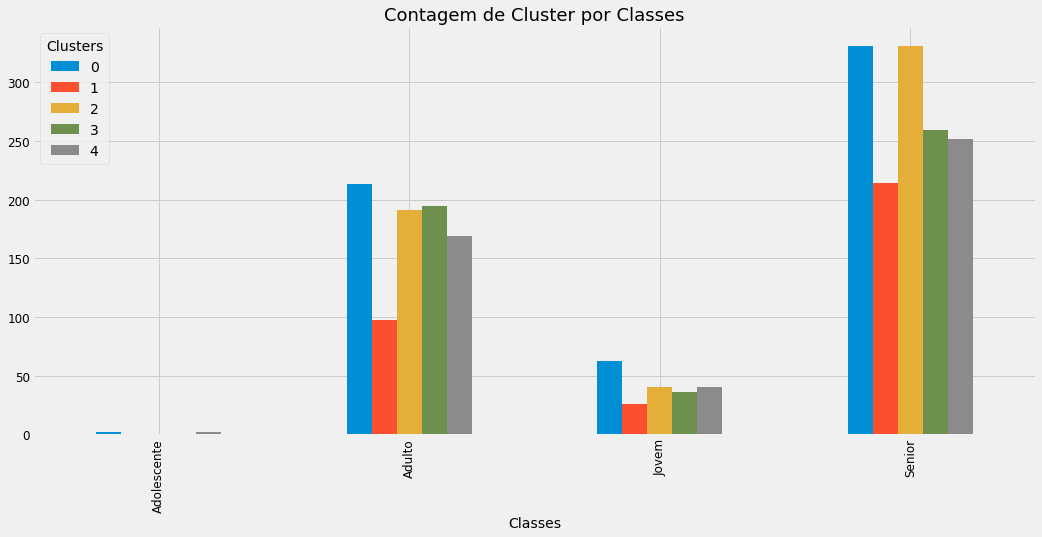

In [24]:
fig = perc.plot(kind='bar',
                      figsize=(16,7),
                      )
plt.legend(title='Clusters')

plt.xlabel('Classes',fontsize=14,color='black')

plt.title("Contagem de Cluster por Classes",fontsize=18)

In [34]:
#Fazer a separaçao do cluster para algumas analises e finalizar o projeto
novo_cluster_1 = cluster_map[(cluster_map.Heroina=='Sim') & (cluster_map.Cocaina=='Sim') & (cluster_map.Fantanil=='Sim')]
novo_cluster_2 = cluster_map[(cluster_map.AnyOpioid=='Sim') & (cluster_map.Benzodiazepina=='Sim') & (cluster_map.Etanol=='Sim')]

In [35]:
novo_cluster_1.groupby(['Nova_Data','Etnia'])['Cluster'].value_counts()

Nova_Data  Etnia     Cluster
Adulto     Black     0           9
           Hispanic  0          10
                     3           1
           Other     0           3
                     3           1
           White     0          30
                     3           7
Jovem      Black     0           1
           Hispanic  0           5
                     3           1
           White     0          13
                     3           1
Senior     Black     0          17
                     3           2
           Hispanic  0          18
           Other     0           3
           White     0          43
                     3          15
Name: Cluster, dtype: int64

In [36]:
novo_cluster_2.groupby(["Nova_Data",'Etnia'])['Cluster'].value_counts()

Nova_Data  Etnia     Cluster
Adulto     Black     4           3
           Hispanic  4           1
           Other     4           1
           White     3           5
                     4           5
                     0           1
Jovem      Black     4           1
           Hispanic  4           2
           Other     0           1
           White     4           2
Senior     Black     3           1
                     4           1
           Hispanic  0           1
                     3           1
                     4           1
           Other     3           1
           White     4          23
                     3           6
Name: Cluster, dtype: int64

Text(0.5, 1.0, 'Comportamento das Classes em relação a Idade - Cluster 1')

<Figure size 1152x504 with 0 Axes>

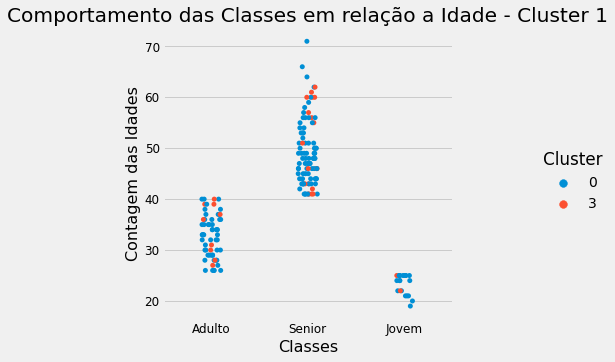

In [37]:
#tamanho da figura
plt.figure(figsize=(16,7))

#criação do grafico
fig = sns.catplot(x='Nova_Data',y='Idade',hue='Cluster',data=novo_cluster_1)

#label do eixo x
plt.xlabel("Classes", fontsize=16,color='black')

#label do eixo y
plt.ylabel('Contagem das Idades', fontsize=16, color='black')

#titulo
plt.title("Comportamento das Classes em relação a Idade - Cluster 1")

#Cluster 1: Foi separado em Heroina, Cocaina e Fantanil: 
# Nota-se que o K-means separou entre o cluster 0 e 3 sendo que o cluster 0 conteve a maior quantidade

Text(0.5, 1.0, 'Comportamento Etnia em relação a Idade - Cluster 1')

<Figure size 1152x504 with 0 Axes>

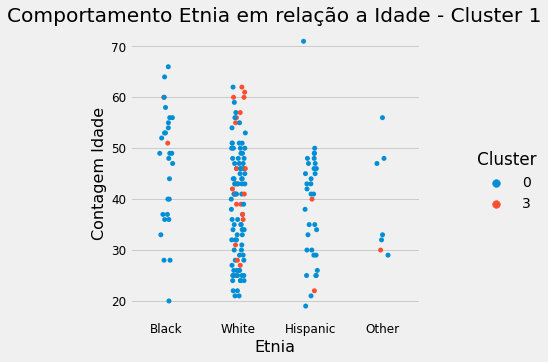

In [38]:
#tamanho da figura
plt.figure(figsize=(16,7))

#criação do grafico
fig = sns.catplot(x='Etnia',y='Idade',hue='Cluster',data=novo_cluster_1)

#label do eixo x
plt.xlabel("Etnia", fontsize=16, color='black')

#label eixo y
plt.ylabel("Contagem Idade", fontsize=16, color='black')

#titulo
plt.title('Comportamento Etnia em relação a Idade - Cluster 1')

#Cluster 1: Foi separado em Heroina, Cocaina e Fantanil: 
# Nota-se que o K-means separou entre o cluster 0 e 3 sendo que o cluster 0 conteve a maior quantidade

Text(0.5, 1.0, 'Comportamento Etnia em relção Idade - Cluster 2')

<Figure size 1152x504 with 0 Axes>

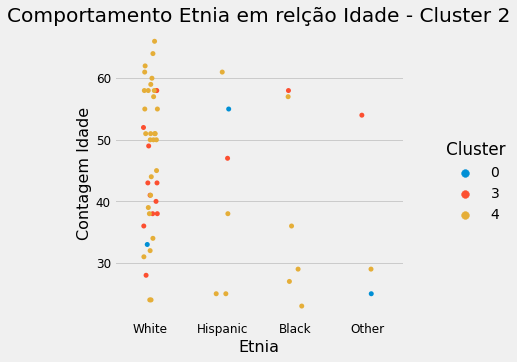

In [39]:
#tamanho da figura
plt.figure(figsize=(16,7))

#criação do grafico
fig = sns.catplot(x='Etnia',y='Idade',hue='Cluster',data=novo_cluster_2)

#eixo x
plt.xlabel("Etnia", fontsize=16, color='black')

#eixo y
plt.ylabel("Contagem Idade", fontsize=16, color='black')

#titulo
plt.title("Comportamento Etnia em relção Idade - Cluster 2")

#Cluster 2: Foi separado em AnyOpioid, Benzodiazepina,  e Etanol: 
# Nota-se que o K-means separou entre o cluster 4 da classe Write conteve a maior quantidade.

Text(0.5, 1.0, 'Comportamento das Classes em relação a Idade - Cluster 2')

<Figure size 1152x504 with 0 Axes>

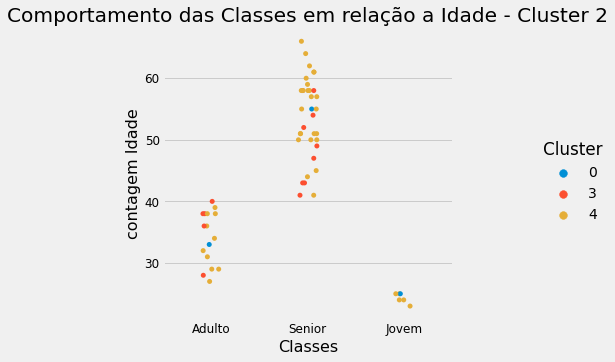

In [40]:
#tamanho da figura
plt.figure(figsize=(16,7))

#criação d grafico

fig = sns.catplot(x='Nova_Data',y='Idade',hue='Cluster',data=novo_cluster_2)

#label x
plt.xlabel('Classes', fontsize=16, color='black')

#label y
plt.ylabel('contagem Idade', fontsize=16, color='black')

#titulo
plt.title("Comportamento das Classes em relação a Idade - Cluster 2")

##Cluster 2: Foi separado em AnyOpioid, Benzodiazepina,  e Etanol: 
# Nota-se que o K-means separou entre o cluster 4 da classe Senior conteve a maior quantidade.

# FIM!!